In [25]:
from decision_tree.tree import DecisionTree
from sklearn.datasets import make_classification, load_digits, make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

Протестируем дерево решений на синтетических данных

In [3]:
X, y = make_classification(n_features=2, n_redundant=0, n_samples=400, random_state=17)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

tree = DecisionTree(max_depth=4, debug=True)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)


DecisionTree params:
{'max_depth': 4, 'min_samples_split': 2, 'criterion': 'gini', 'debug': True}
depth = 1, n_samples = 280
best feature = 1, best threshold = -0.045257943644649634
depth = 2, n_samples = 131
best feature = 0, best threshold = -1.8409776430822302
depth = 3, n_samples = 21
best feature = 1, best threshold = -1.1641925852743231
depth = 3, n_samples = 110
best feature = 1, best threshold = -0.21858191679382055
depth = 2, n_samples = 149
best feature = 1, best threshold = 0.5134939244583847
depth = 3, n_samples = 42
best feature = 1, best threshold = 0.44661106743033363
depth = 3, n_samples = 107
best feature = 0, best threshold = -1.5690365507305226


0.85

Text(0.5, 1.0, 'True class labels')

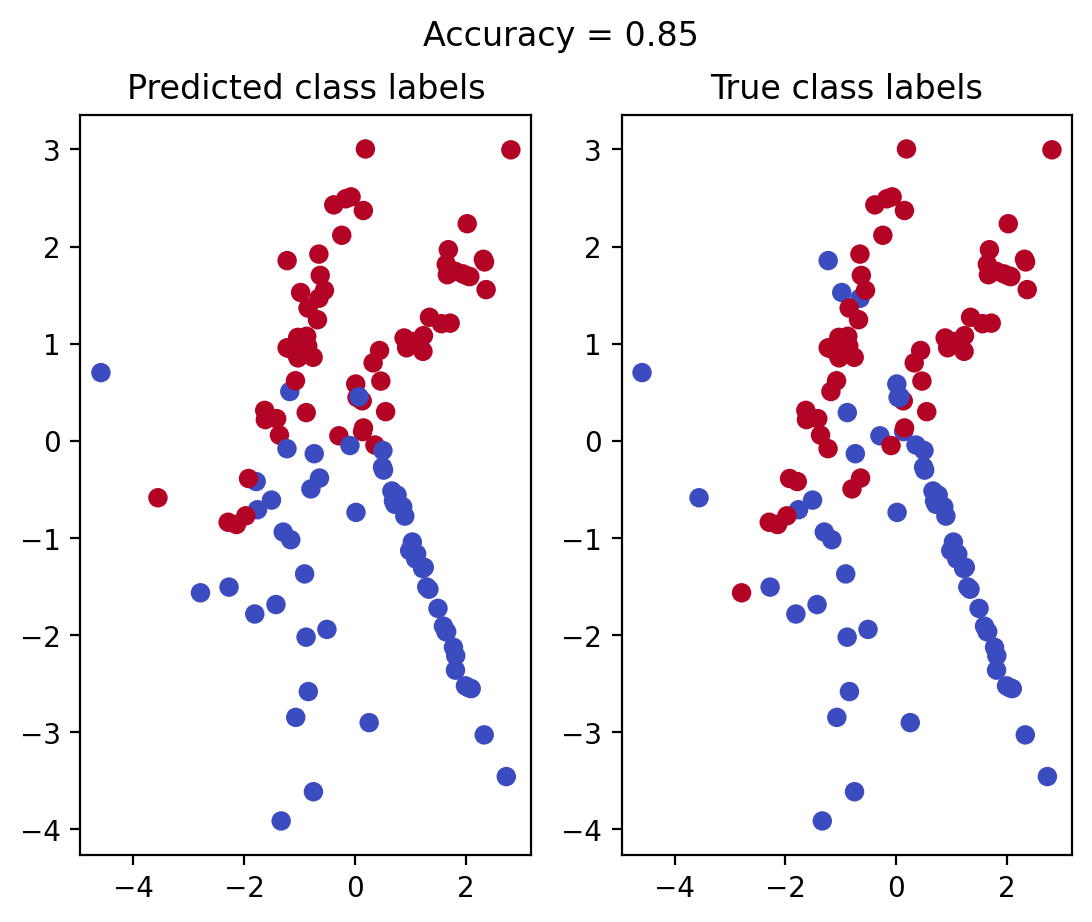

In [4]:
plt.suptitle("Accuracy = {:.2f}".format(0.85))

plt.subplot(121)
plt.scatter(X_test[:,0], X_test[:, 1], c=y_pred, cmap=plt.cm.coolwarm)
plt.title("Predicted class labels")

plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.title("True class labels")

### Протестируем алгоритм на реальных данных

In [5]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [6]:
gini_tree = DecisionTree(max_depth=2, criterion="gini")
gini_tree.fit(X_train, y_train)

entropy_tree = DecisionTree(max_depth=2, criterion="entropy",)
entropy_tree.fit(X_train, y_train)

y_pred_gini = gini_tree.predict(X_test)
y_pred_entropy = entropy_tree.predict(X_test)

accuracy_score(y_pred_gini, y_test), accuracy_score(y_pred_entropy, y_test)

(0.18888888888888888, 0.175)

Подберем параметры на кросс валидации

In [7]:
%%time
tree_params = {
    "max_depth": range(3, 11),
}

grid_clf_crit_gini = GridSearchCV(
    estimator=DecisionTree(criterion="gini"),
    param_grid=tree_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_clf_crit_gini.fit(X_train, y_train)
print(grid_clf_crit_gini.best_score_, grid_clf_crit_gini.best_params_)

0.8434306039488966 {'max_depth': 10}
CPU times: user 2.3 s, sys: 127 ms, total: 2.42 s
Wall time: 17.4 s


In [8]:
%%time
tree_params = {
    "max_depth": range(3, 11),
}

grid_clf_crit_entropy = GridSearchCV(
    estimator=DecisionTree(criterion="entropy"),
    param_grid=tree_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_clf_crit_entropy.fit(X_train, y_train)
print(grid_clf_crit_gini.best_score_, grid_clf_crit_gini.best_params_)

0.8434306039488966 {'max_depth': 10}
CPU times: user 2.11 s, sys: 44.4 ms, total: 2.16 s
Wall time: 16.1 s


Простроим график на котором сравним, качество модели с критерием gini и entropy 

Text(0, 0.5, 'Accuracy')

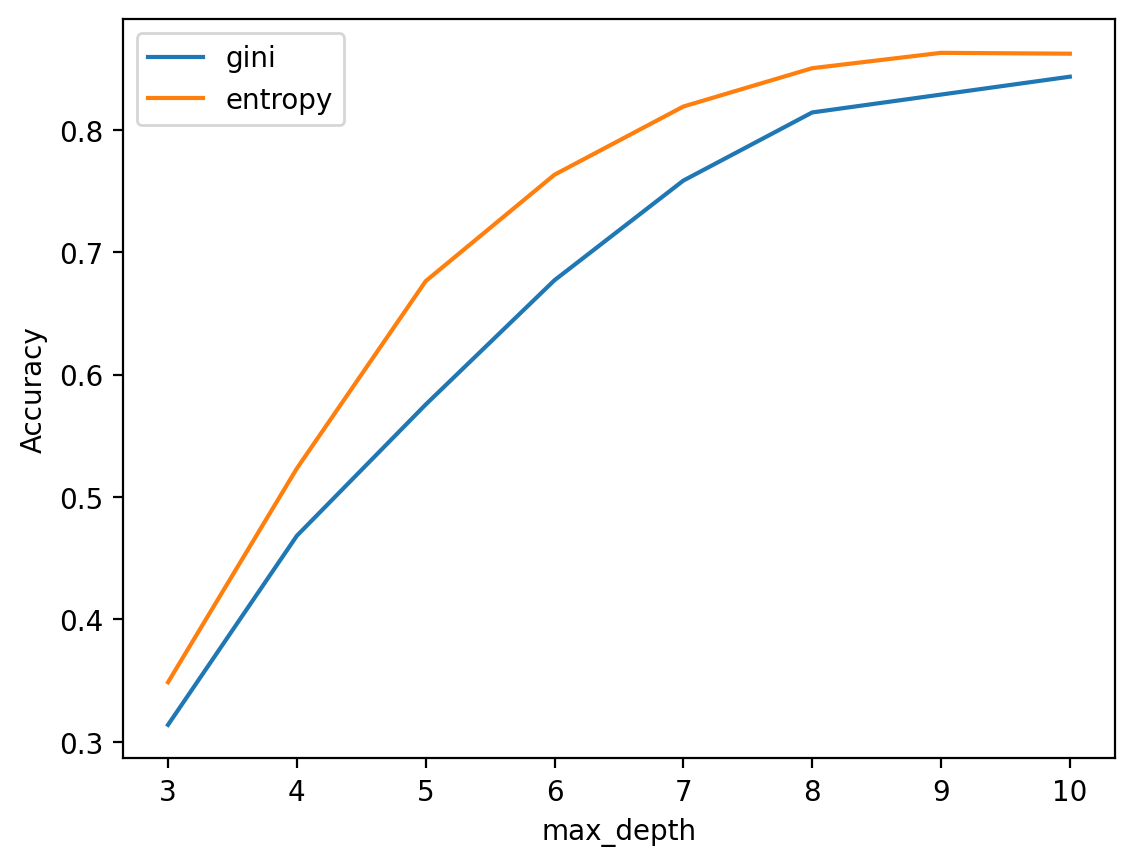

In [18]:
scores_for_crit_gini = np.array(grid_clf_crit_gini.cv_results_["mean_test_score"])
scores_for_crit_entropy = np.array(grid_clf_crit_entropy.cv_results_["mean_test_score"])

plt.plot(tree_params["max_depth"], scores_for_crit_gini, label="gini")
plt.plot(tree_params["max_depth"], scores_for_crit_entropy, label="entropy")
plt.legend(loc="best")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")


## Протестируем модель в задаче регрессии

Text(0.5, 1.0, 'MSE = 165.76')

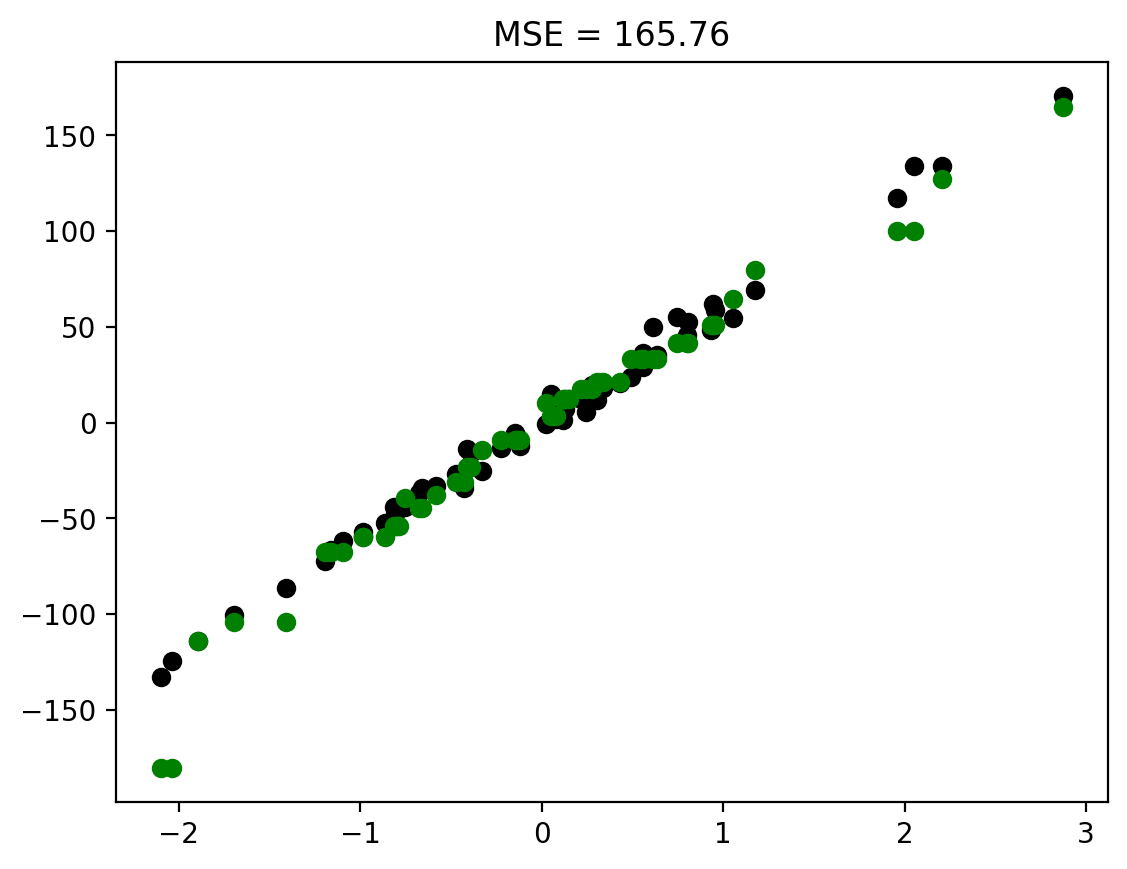

In [51]:
X, y = make_regression(n_features=1, n_samples=200, bias=0, noise=5, random_state=17)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

reg = DecisionTree(max_depth=6, criterion="mad_median")
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

plt.scatter(X_test[:, 0], y_test, color="black")
plt.scatter(X_test[:, 0], y_pred, color="green")
plt.title("MSE = {:.2f}".format(mse))
